In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv')

In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
df['recipe'].duplicated().sum()

0

In [6]:
df.describe(include='all')

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,NaN,106,389,574
mean,474.000000,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,273.519652,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,1.000000,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,237.500000,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,474.000000,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,710.500000,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


In [7]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [8]:
df['category'] = df['category'].str.replace('Chicken Breast', 'Chicken')

In [9]:
df['category'] = df['category'].astype('category')

In [10]:
df['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [11]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [12]:
df['servings'] = [i.split(' as a snack')[0].strip() if 'as' in i else i for i in df['servings']]

In [13]:
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [14]:
df['traffic'] = [1 if i =='High' else 0 for i in df['high_traffic']]

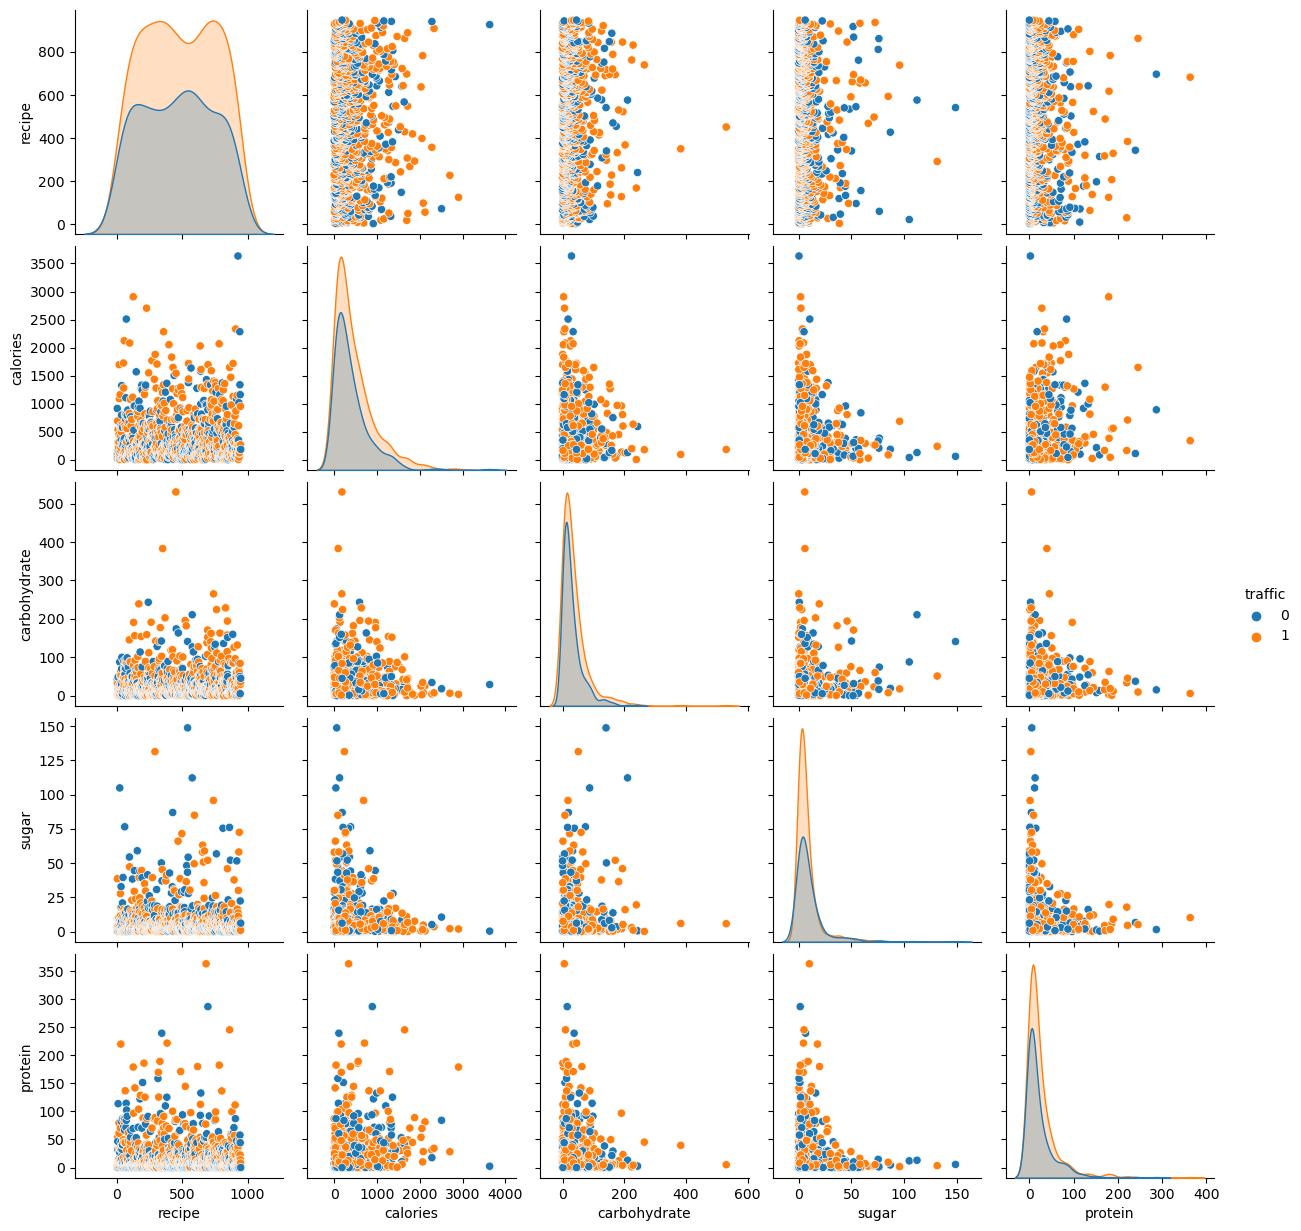

In [15]:
sns.pairplot(data = df,\
             hue = 'traffic')
plt.show()

In [16]:
cols_to_impute = df.drop(axis=1, columns=['high_traffic']).columns[df.drop(axis=1, columns=['high_traffic']).isnull().sum()>0].to_list()

In [17]:
grouped = df.groupby(['category','servings'])

In [18]:
for i in cols_to_impute:
    df[i] = grouped[i].transform(lambda x: x.fillna(x.median()))

In [20]:
df = df.drop(axis =1, columns=['high_traffic'])

In [21]:
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
traffic         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    object  
 7   traffic       947 non-null    int64   
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 53.2+ KB


This data set has **947** rows, **8** columns with missing values before cleaning.
- **recipe**: Exhibiting unique entries without any missing values or duplicates.
- **calories**: The distribution of calories is unimodal and skewed to the right, centered at about 299.14 with most of the data between 113.905 and 576.635, a range of roughly 3633, and outliers are present on the higher end. 52 missing values was imputed by median of subgroups. 
- **carbohydrate**: The distribution of carbohydrate is unimodal and skewed to the right, centered at about 21.41 with most of the data between 9.135 and 43.23, a range of roughly 530, and outliers are present on the higher end. 52 missing values was imputed by median of subgroups. 
- **sugar**: The distribution of sugar is unimodal and skewed to the right, centered at about 4.46 with most of the data between 1.795 and 148.75, a range of roughly 147, and outliers are present on the higher end. 52 missing values was imputed by median of subgroups. 
- **protein**: The distribution of protein is unimodal and skewed to the right, centered at about 11.2 with most of the data between 3.425 and 30.735, a range of roughly 360, and outliers are present on the higher end. 52 missing values was imputed by median of subgroups. 
- **category**: Encompasses 10 distinct categories. 'Chicken Breast' was replaced by 'Chicken'.
- **servings**: Encompasses 3 distinct categories. '4 as a snack' was replaced by '4' while '6 as a snack' was replaced by '6'.
- **traffic**: Encompasses 2 distinct categories. The categories are replaced by 1 for 'High' and 0 for missing values.